## Reporting: wrangle_report


<p>
    Data for this project was retrieved from three different source. The first batch was retrieved from a CSV file
    (twitter-archive-enhanced.csv). This file was downloaded and loaded into dataframe called archives_df using the
    pandas read_csv method. The second batch was downloaded pragmatically using the requests library and written into a
    predictions.tsv file that was stored in the project’s root folder. The Pandas’ read_csv method was subsequently used
    to read the data from the file that it was saved into predictions_df dataFrame. The last batch of data was retrieved
    from a text file that contained JSON data. I used the glob module to find text files in my working directory, then
    used a For Loop together with the Python readline() method to read each line of the file. I then converted what was
    read using the readline method into a json Object that I later parsed into a Python dictionary object.
</p>

<p>
    After testing and ensuring that I had loaded all the datasets correctly into their respective dataframes, I
    proceeded with assessing the 1st data from the archives CSV file both visually and programmatically. I used the
    pandas.DataFrame.sample method to get a visual representation of how the rows were populated. I noticed that some
    columns had populated almost entirely by NULL values.
</p>

<h5> List of Data Quality isssues that were noted in the datasets </h5>
<h6>archive_df Table</h6>
<ol>
    <li>duplicate tweets inform of retweets</li>
    <li>tweet_id is an integer instead of a string object</li>
    <li>timestamp is a string object</li>
    <li>in_reply_to_user_id, in_reply_to_status_id, retweeted_status_timestamp, retweeted_status_id and
        retweeted_status_user_id columns have null values</li>
    <li>The source of the tweet is embedded in html tags in the source column</li>
    <li>missing names represented as None</li>
    <li>names extracted incorrectly in some cases i.e 'a', 'the', 'an' among many others</li>
    <li>rating_denominator is greater than or less than 10 in some cases</li>
</ol>

<h6>additional_tweet_df Table </h6>
<ol>
    <li>created_at column in the additional_tweets_df is a duplicated of the timestamp column in archives_df</li>
    <li>tweet_id is an integer instead of a string object</li>
</ol>
<h6>predictions_df Table </h6>
<ol>
    <li>tweet_id is an integer instead of a string object</li>
</ol>

<h5>Tidiness Issues</h5>
<ol>
    <li>The doggo, floofer, pupper and puppo identifiers should unpivoted into a single column</li>
    <li>The three tables should be merged into a single unit.</li>
</ol>


<p>
    For visual assessment of the data in all the dataframes, I started by displaying a sample of the rows to the prompt
    by using the DataFrame.sample() method that returns random rows. This gave me a general preview of what was
    contained in the tables and ideas on how to best deal with the data. Below is a screenshot of the results of a
    .sample() method:
</p>

*Sample output from .sample Method*

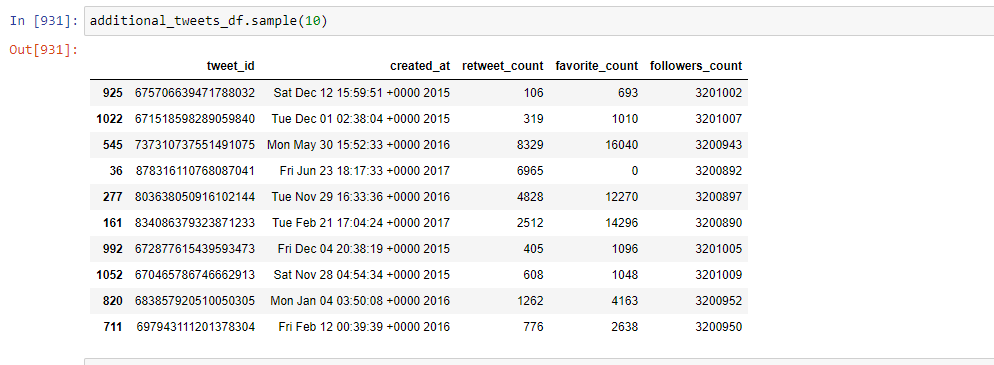

<p>
    I used the DataFrame.info() and the DataFrame.shape methods to get a summary of the columns and their respective
    data Types. The inbuilt .duplicated() method also came in handy when it came to checking the for the presence of
    duplicate rows in all dataframes. However, the duplicated() method couldn’t be used to detect duplicate retweets
    that were in form of retweets because they too had unique tweet_id identifiers. The only possible to remove these
    retweets was through locating tweets with values in the retweeted_status_id column and dropping the rows from the
    dataframe.
</p>

 *Sample output from the .info method*

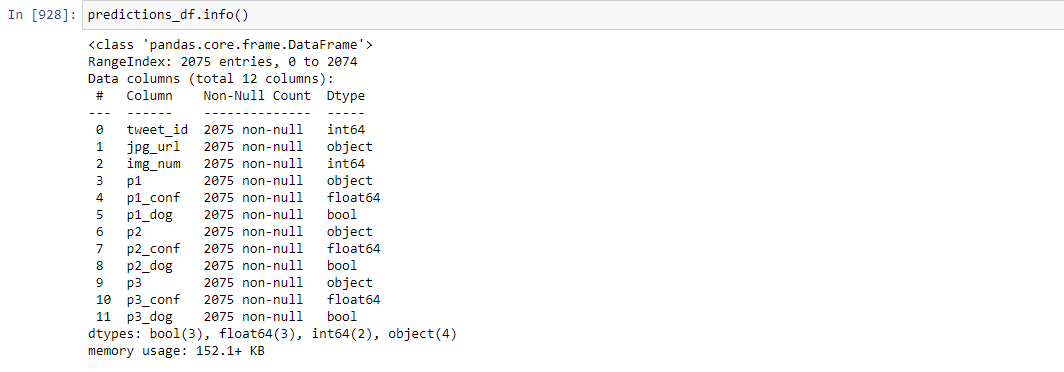

<p>
    Cleaning the second issue of the tweet_id being an integer instead of a string was a breeze. All I had to do was to
    change the datatype into a string using the .astype method. This was the same case with timestamp column being a
    string object instead of a datetime object. The only difference was, I had to call the Pandas.DataFrame.to_datetime
    function to convert it to the required datatype. The fourth issue that I cleaned involved the dropping on
    retweeted-related columns from the table because they were mostly populated with Nulls therefore wouldnt serve any
    purpose in our analysis. Retweets could be identified by checking for rows with Non-Null values in the retweeted_status_id column. 
</p>


*Sample Retweets*
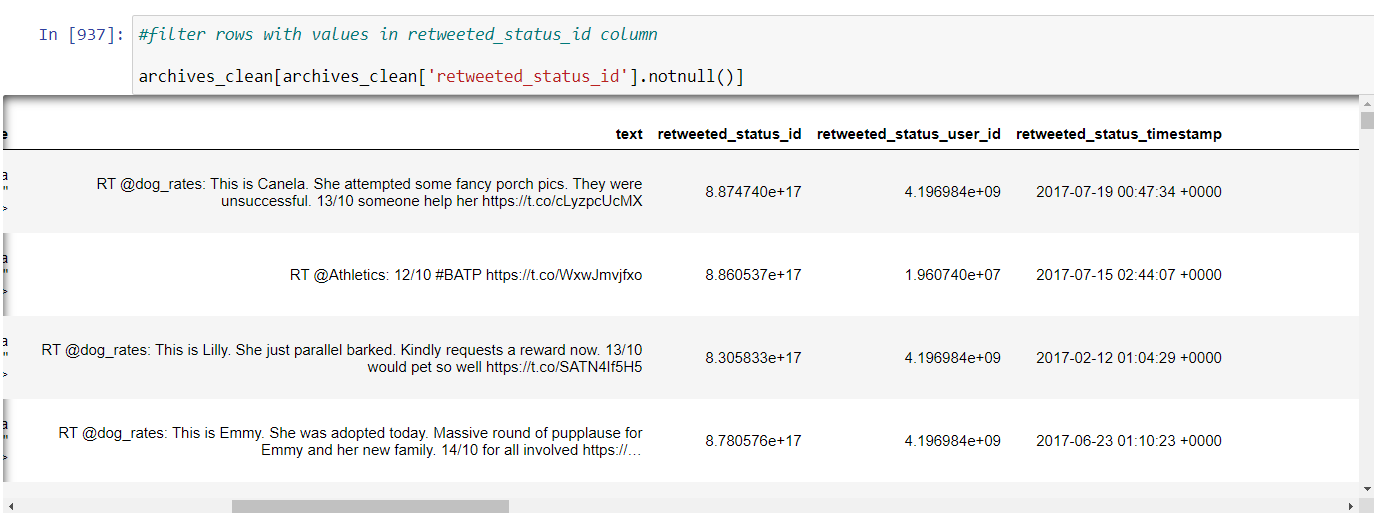

<p>
    Cleaning the fifth issue in the archives_df dataframe involved the use of the apply() method together with a lambda
    function. I split the string using the opening html brace, then resplit the resulting object on a whitespace and
    picked the last item in the list. After that split the picked item on whitespace and removed the remaining html
    using a the split method.
</p>

*cleaning the 5th data quality issue*

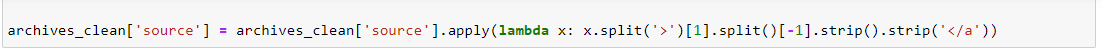

<p>
    I used the <i>replace</i> method to replace the word None with No_Name to solve the 6th issue of mssing names which were
    represented as None. I applied the same method in cleaning the 7th quality issue as well.
</p>

<p>
    Cleaning the 8th data quality issue of rating_denominators having figures other that a 10 was multi-step process that cannot be summarized with a few words. it involved filtering out instances where the rating denominator was less than 10, doing a manual check of the rating from the text, and updating them. I repeated the same process for instances where the rating denominator was greater than 10. These steps are documented and detailed in the wrangle_act report.  
</p>

<p>After ensuring that everything was in order, I worked on cleaning the tidiness isues by moulding the doggo, puppo, floofer, and pupper into a single column. Then I employed the merge function to perform a left join on the three dataframes. 
</p>


*Code for joining the dataframes:*
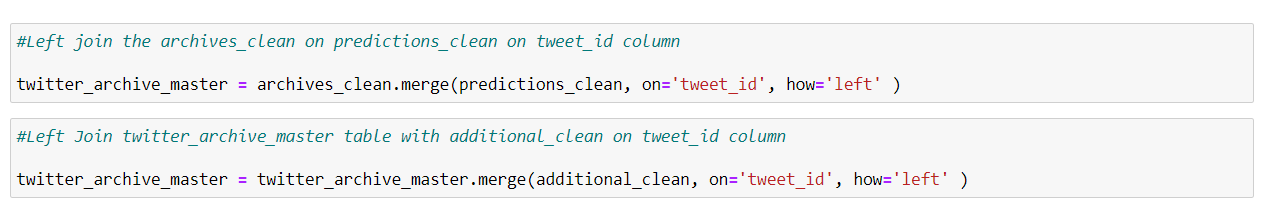

<p>
    Finally I stored the resulting clean master table into a CSV file in my local storage, as shown below, before commencing work on the
    analysis and visualization stage. 
</p>

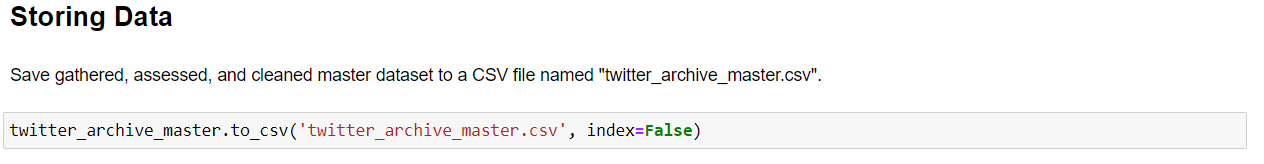